<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [292]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [293]:
sat_data = {}

with open('sat_scores.csv', 'r') as f:
    data = []
    for line in f.read().splitlines():
        data.append(line.split(',')) 
    
sat_data = {column: [] for column in data[0]}

for row in range(1,len(data)):
    for column in range(4):
        try:
            sat_data[data[0][column]].append(float(data[row][column]))
        except:
            sat_data[data[0][column]].append(data[row][column])                                 
                                             
print type(sat_data['Math'][0])
print sat_data


<type 'float'>
{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [294]:
dataframe1 = pd.DataFrame(sat_data)
dataframe2 = pd.read_csv('sat_scores.csv')

print dataframe1

print dataframe2


     Math  Rate State  Verbal
0   510.0  82.0    CT   509.0
1   513.0  81.0    NJ   499.0
2   515.0  79.0    MA   511.0
3   505.0  77.0    NY   495.0
4   516.0  72.0    NH   520.0
5   499.0  71.0    RI   501.0
6   499.0  71.0    PA   500.0
7   506.0  69.0    VT   511.0
8   500.0  69.0    ME   506.0
9   501.0  68.0    VA   510.0
10  499.0  67.0    DE   501.0
11  510.0  65.0    MD   508.0
12  499.0  65.0    NC   493.0
13  489.0  63.0    GA   491.0
14  501.0  60.0    IN   499.0
15  488.0  57.0    SC   486.0
16  474.0  56.0    DC   482.0
17  526.0  55.0    OR   526.0
18  499.0  54.0    FL   498.0
19  527.0  53.0    WA   527.0
20  499.0  53.0    TX   493.0
21  515.0  52.0    HI   485.0
22  510.0  51.0    AK   514.0
23  517.0  51.0    CA   498.0
24  525.0  34.0    AZ   523.0
25  515.0  33.0    NV   509.0
26  542.0  31.0    CO   539.0
27  439.0  26.0    OH   534.0
28  539.0  23.0    MT   539.0
29  512.0  18.0    WV   527.0
30  542.0  17.0    ID   543.0
31  553.0  13.0    TN   562.0
32  542.0 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [295]:
dataframe2.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [296]:
dataframe2_dict = {'column': {'State': ['String', 'State where data was recorded'], 
                              'Rate': ['Integer', 'Rate of ASDHSAFHSALDHALS'], 
                              'Verbal': ['Integer', 'Average state score for the Verbal component'], 
                              'Math': ['Integer', 'Average state score for the Math component']
                             }
                  }




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\User\Anaconda3\envs\py2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


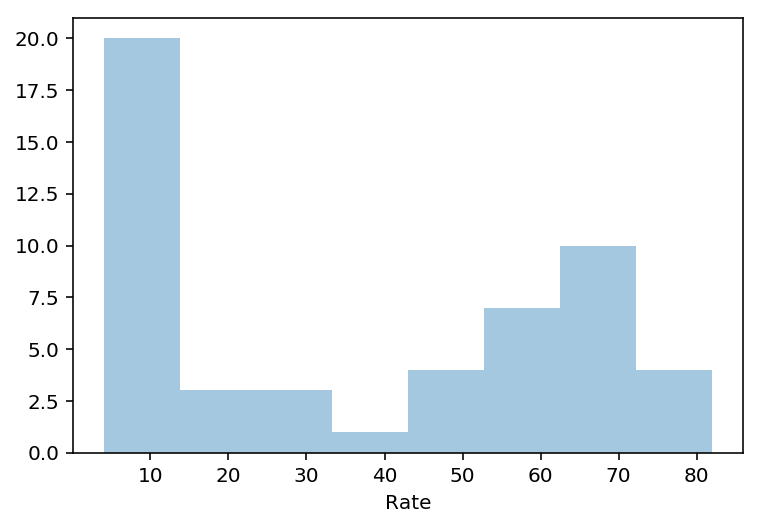

In [297]:
sns.distplot(dataframe2['Rate'], bins=8, kde=False)

C:\Users\User\Anaconda3\envs\py2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


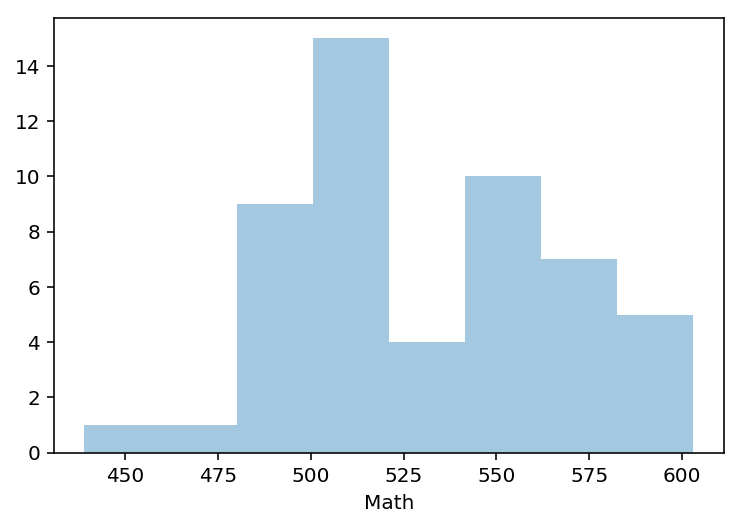

In [298]:
sns.distplot(dataframe2['Math'], bins=8, kde=False)

C:\Users\User\Anaconda3\envs\py2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


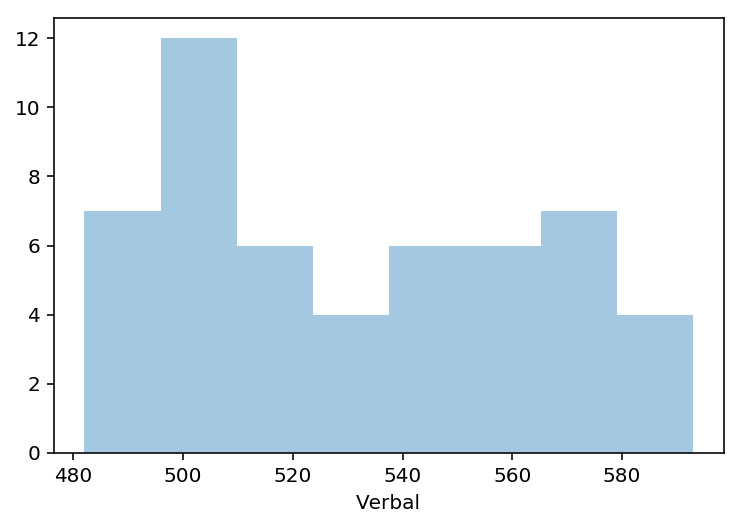

In [299]:
sns.distplot(dataframe2['Verbal'], bins=8, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

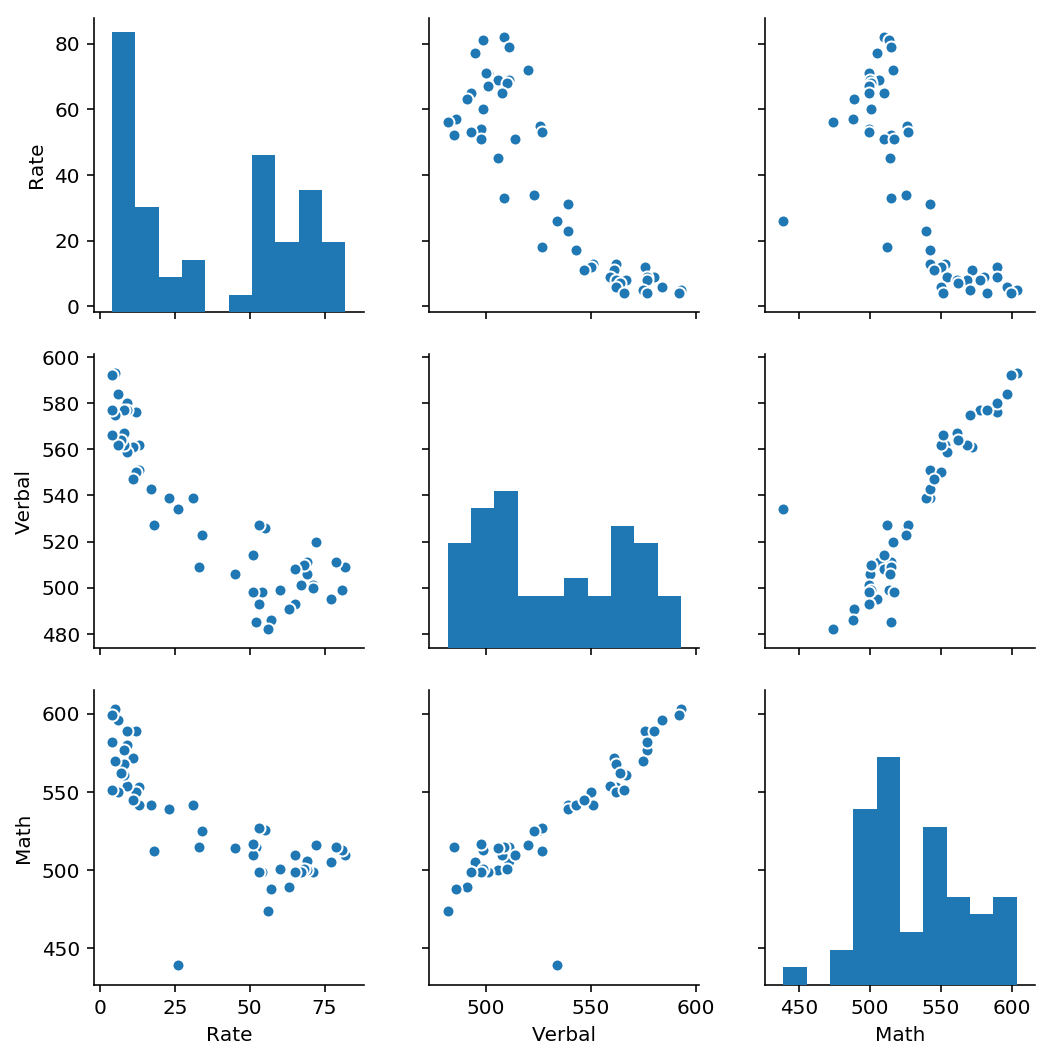

In [300]:
sns.pairplot(dataframe2)

This visualization shows that Math and Verbal values have a strong positive correlation, while Rate has a weak negative correlation with both Math and Verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

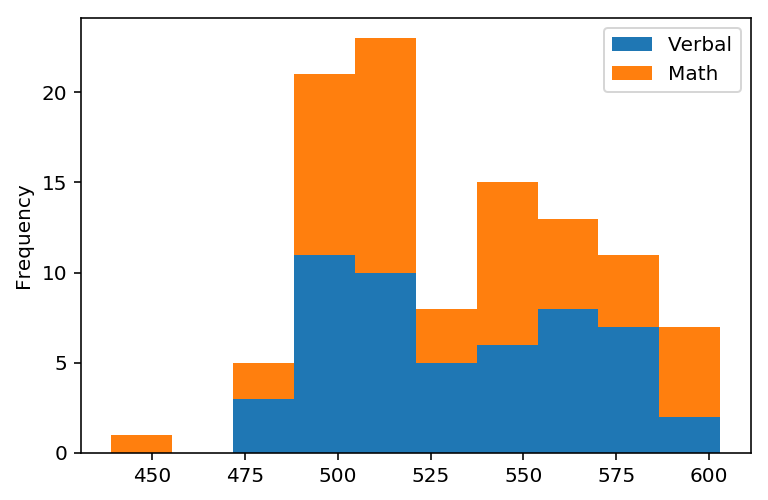

In [301]:
dataframe_verbal_math = dataframe2.copy(deep=True)

dataframe_verbal_math.drop(columns=['State', 'Rate'], inplace=True)


dataframe_verbal_math.plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

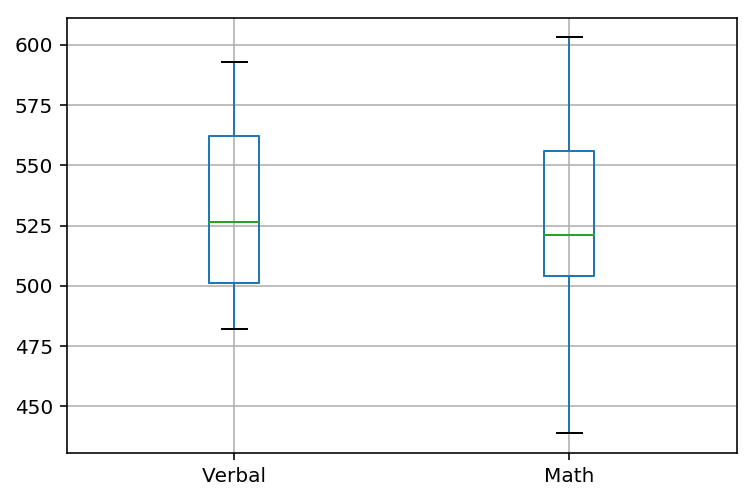

In [302]:
dataframe_verbal_math.boxplot()

#dataframe2.boxplot()

The value of Rate is evidently on a different scale from Verbal and Math, likely being in the range 0-100 while Verbal and Math are both in the ~400 to 600 range.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


C:\Users\User\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


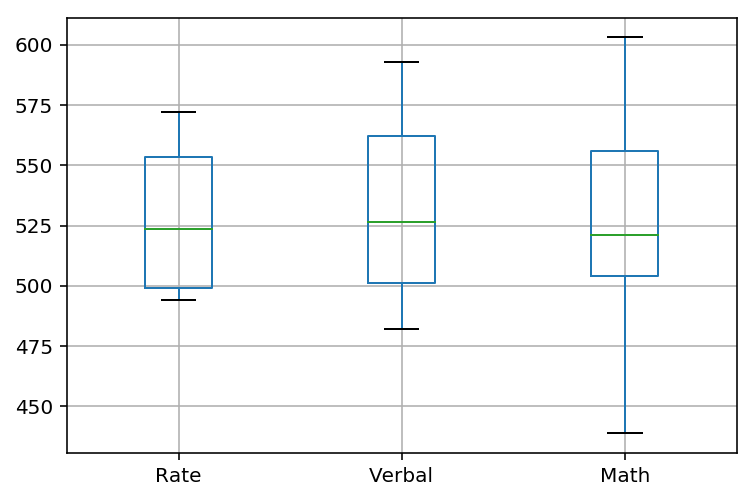

In [303]:
dataframe_adjustedrate = dataframe2.copy(deep=True)

adjustment_factor = (np.median(dataframe2['Math']) + np.median(dataframe2['Verbal']))/2 - np.median(dataframe2['Rate']) 

#dataframe_adjustedrate.set_value(0, 'State', 'CT')
#print dataframe_adjustedrate

#this scales the values in ['Rate'] by adding a fixed value such that
#their median is the average of the median values of ['Math'] and ['Verbal']

for row in range(0,len(dataframe_adjustedrate["Rate"])):
    dataframe_adjustedrate.set_value(row, 'Rate', dataframe_adjustedrate['Rate'][row] + adjustment_factor)
    
dataframe_adjustedrate.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [304]:
count = 0
for row in range((len(dataframe2['Verbal'])-1)):
    if dataframe2.loc[row, 'Verbal'] > np.mean(dataframe2['Verbal']):
        print dataframe2.loc[row, 'State']
        count += 1
        
print "Out of {} states, there are {} states with a 'Verbal' score higher than the average.".format(len(dataframe2['State'])-1, count)
print "This shows us that the distribution of state 'Verbal' scores are relatively even around the mean."

CO
OH
MT
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS
Out of 51 states, there are 24 states with a 'Verbal' score higher than the average.
This shows us that the distribution of state 'Verbal' scores are relatively even around the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [305]:
count = 0
for row in range(len(dataframe2['Verbal'])-1):
    if dataframe2.loc[row, 'Verbal'] > np.median(dataframe2['Verbal']):
        print dataframe2.loc[row, 'State']
        count += 1
        
print "Out of {} states, there are {} states with a 'Verbal' score higher than the median.".format(len(dataframe2['State']) -1, count)
print "This is relatively similar to the comparison against the mean 'Verbal' score, as the distribution is fairly even without significant outliers."


WA
CO
OH
MT
WV
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS
Out of 51 states, there are 26 states with a 'Verbal' score higher than the median.
This is relatively similar to the comparison against the mean 'Verbal' score, as the distribution is fairly even without significant outliers.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

dSpecifically, this should be `Verbal - Math`.

In [306]:
dataframe2['Verbal - Math'] = pd.Series([dataframe2['Verbal'][row] - dataframe2['Math'][row] for row in 
                                         range(len(dataframe2['Verbal']))], index=dataframe2.index) 

# for row in range(len(dataframe2['Verbal'])):
#     print dataframe2['Verbal'][row] - dataframe2['Math'][row]
                                        
print dataframe2

   State  Rate  Verbal  Math  Verbal - Math
0     CT    82     509   510             -1
1     NJ    81     499   513            -14
2     MA    79     511   515             -4
3     NY    77     495   505            -10
4     NH    72     520   516              4
5     RI    71     501   499              2
6     PA    71     500   499              1
7     VT    69     511   506              5
8     ME    69     506   500              6
9     VA    68     510   501              9
10    DE    67     501   499              2
11    MD    65     508   510             -2
12    NC    65     493   499             -6
13    GA    63     491   489              2
14    IN    60     499   501             -2
15    SC    57     486   488             -2
16    DC    56     482   474              8
17    OR    55     526   526              0
18    FL    54     498   499             -1
19    WA    53     527   527              0
20    TX    53     493   499             -6
21    HI    52     485   515    

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [307]:
holding_list = [[dataframe2['State'][line], dataframe2['Verbal - Math'][line]] for line in range(len(dataframe2['Verbal - Math']))]

# whoops could have used panda's df.sort_values(by='Verbal - Math')
for iter_num in range(len(holding_list)-1,0,-1):
    for idx in range(iter_num):
        if holding_list[idx][1] > holding_list[idx+1][1]:
            temp = holding_list[idx]
            holding_list[idx] = holding_list[idx+1]
            holding_list[idx+1] = temp

dataframe_10gap = pd.DataFrame([list(reversed(holding_list))[i] for i in range(10)], columns = ['State', 'Verbal - Math'])
dataframe_10gap_math = pd.DataFrame([holding_list[i] for i in range(10)], columns = ['State', 'Verbal - Math'])

print dataframe_10gap

print dataframe_10gap_math

print dataframe_10gap.head(3)

print dataframe_10gap_math.head(3)




  State  Verbal - Math
0    OH             95
1    MS             15
2    WV             15
3    AR             12
4    NM              9
5    TN              9
6    VA              9
7    DC              8
8    OK              6
9    ME              6
  State  Verbal - Math
0    HI            -30
1    CA            -19
2    NJ            -14
3    IL            -13
4    WI            -12
5    MI            -11
6    NY            -10
7    IA            -10
8    MN             -9
9   All             -8
  State  Verbal - Math
0    OH             95
1    MS             15
2    WV             15
  State  Verbal - Math
0    HI            -30
1    CA            -19
2    NJ            -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


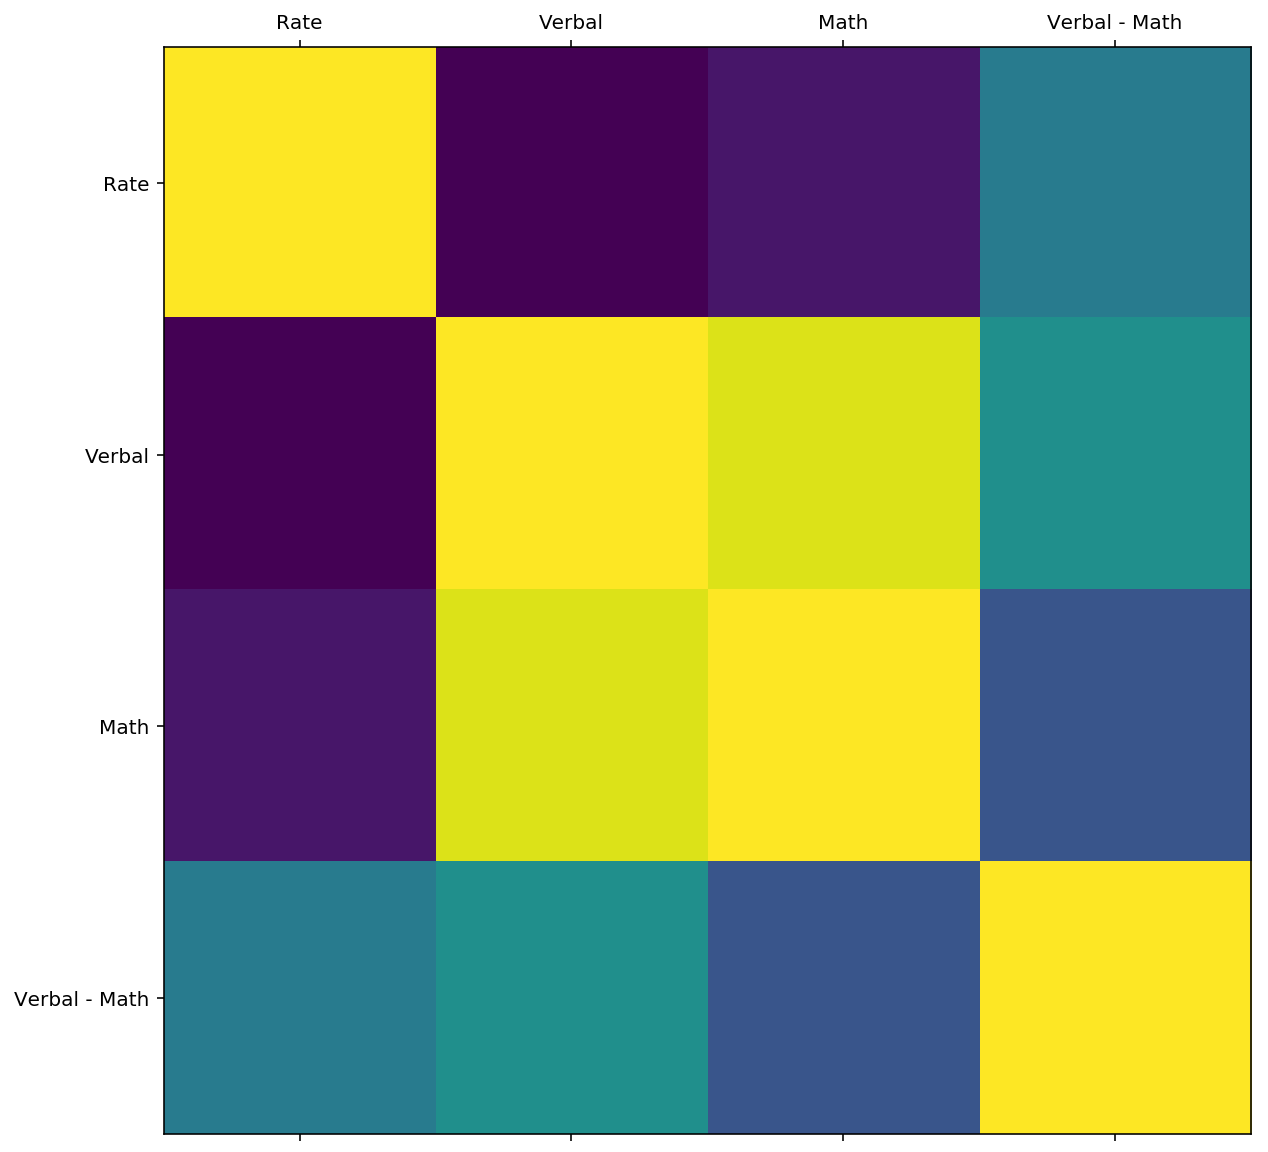

In [308]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(dataframe2)

#it shows that math and verbal are strongly correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [309]:
print dataframe2.describe(), "\n"

print "Count refers to the number of rows in that particular column."
print "Mean refers to the average of all the values in that particular column."
print "std refers to the standard deviation of the values in that particular column."
print "min refers to the lowest of all the values in that particular column."
print "25%, 50% and 75% refer to the 25th, 50th and 75th percentile of the values respectively"
print "Max refers to the highest of all values in that particular column."

            Rate      Verbal        Math  Verbal - Math
count  52.000000   52.000000   52.000000      52.000000
mean   37.153846  532.019231  531.500000       0.519231
std    27.301788   33.236225   36.014975      15.729939
min     4.000000  482.000000  439.000000     -30.000000
25%     9.000000  501.000000  504.000000      -6.000000
50%    33.500000  526.500000  521.000000       0.000000
75%    63.500000  562.000000  555.750000       4.250000
max    82.000000  593.000000  603.000000      95.000000 

Count refers to the number of rows in that particular column.
Mean refers to the average of all the values in that particular column.
std refers to the standard deviation of the values in that particular column.
min refers to the lowest of all the values in that particular column.
25%, 50% and 75% refer to the 25th, 50th and 75th percentile of the values respectively
Max refers to the highest of all values in that particular column.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [310]:
print dataframe2.cov()

print "The correlation matrix examines how one value changes when the other is changed as well, while the covariance matrix examines how two items vary together."

print "You divide each cell by the standard deviation of each of the two variables involved.."

print "The correlation matrix is unaffected by the change in location and scale, and can be used to make a comparison between two pairs of variables."

                     Rate       Verbal         Math  Verbal - Math
Rate           745.387632  -804.355958  -760.803922     -43.552036
Verbal        -804.355958  1104.646682  1077.147059      27.499623
Math          -760.803922  1077.147059  1297.078431    -219.931373
Verbal - Math  -43.552036    27.499623  -219.931373     247.430995
The correlation matrix examines how one value changes when the other is changed as well, while the covariance matrix examines how two items vary together.
You divide each cell by the standard deviation of each of the two variables involved..
The correlation matrix is unaffected by the change in location and scale, and can be used to make a comparison between two pairs of variables.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [311]:
import math

drugdf = pd.read_csv('drug-use-by-age.csv')

#code to float columns and replace non-floatable values with NaN
for cat in drugdf.columns:
    if 'frequency' in cat:
        for row in range(len(drugdf[cat])):
            try:
                drugdf.loc[row,cat] = float(drugdf[cat][row])
            except:
                drugdf.loc[row,cat] = np.NaN
        drugdf[cat] = drugdf[cat].astype(float)

print drugdf.dtypes.head()

#checks if any of the percentage values are above 100
for cat in drugdf.columns:
    if 'use' in cat:
        for row in range(len(drugdf[cat])):
            if drugdf.loc[row,cat] >= 100:
                print drugdf.loc[row,cat]

#checks if frequency of any particular drug is a non-zero value if the number of users for that age group is 0%, then changes it to NaN
for i, j in enumerate(drugdf.columns):
    if 'use' in j:
        for row in range(len(drugdf[j])):
            if drugdf.loc[row,j] == 0:
                if math.isnan(drugdf.loc[row][i+1]) == False:
                    drugdf.loc[row,drugdf.columns[i+1]] = np.NaN

#drugdf.age = drugdf.age.astype(str)

age                   object
n                      int64
alcohol-use          float64
alcohol-frequency    float64
marijuana-use        float64
dtype: object


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

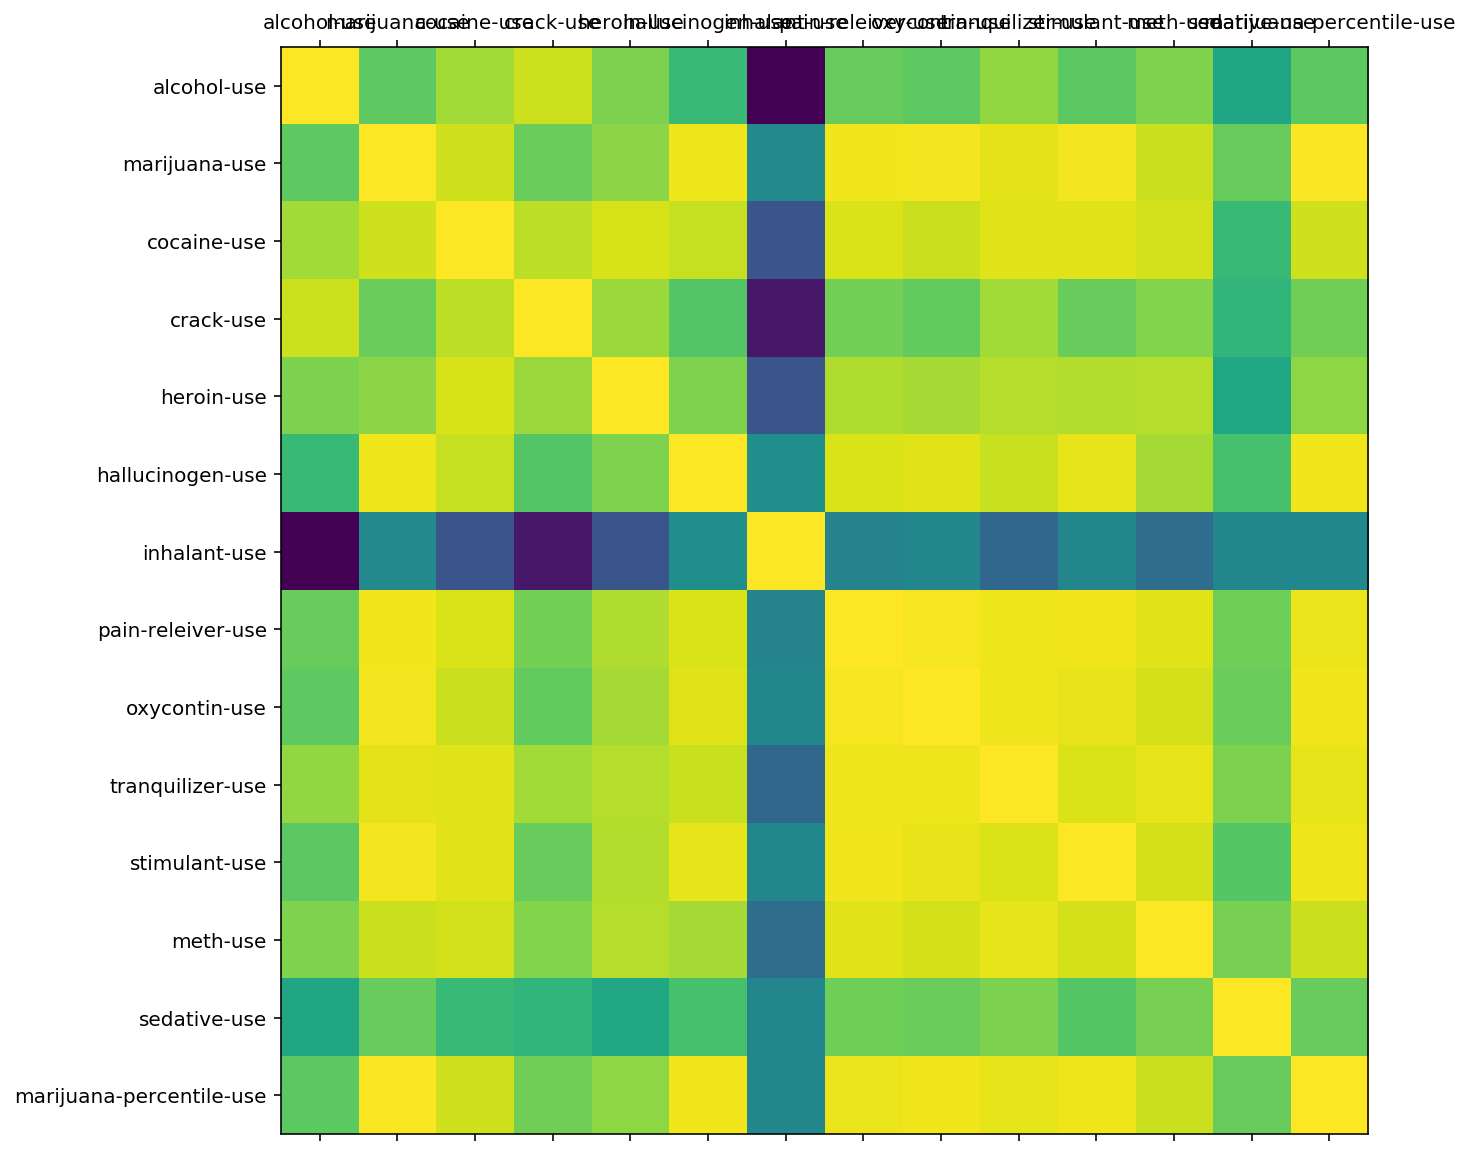

In [360]:
drugdf_freq = drugdf[[column for column in drugdf.columns if 'use' in column]]

plot_corr(drugdf_freq)

Interesting points: inhalant use appears to have a negative correlation with almost every other drug, while the use of pain relievers, oxycontin, tranquilizers, stimulant and meth appear to be highly correlated with each other.

Upon closer inspection of the data it appears to be because those with a lower age tend to use inhalants and not any other drug. Perhaps this has something to do with accessibility at that age.

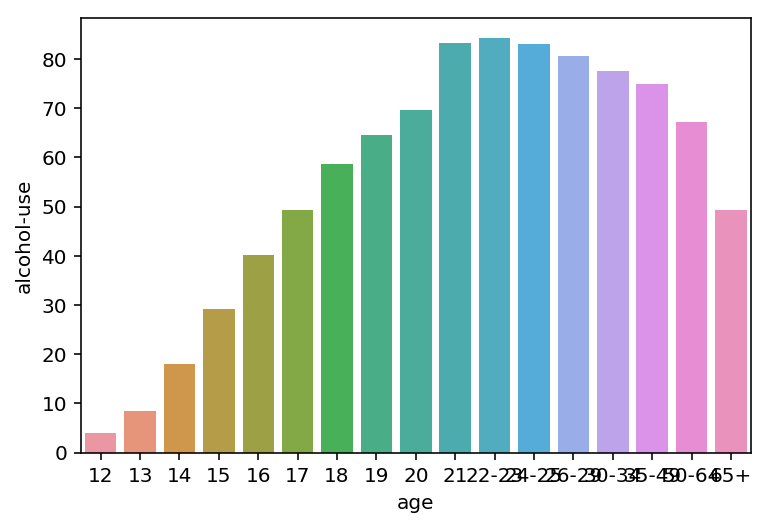

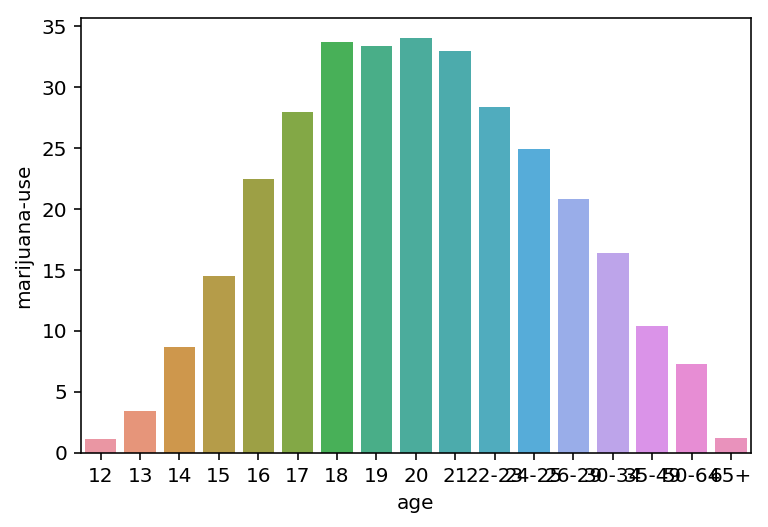

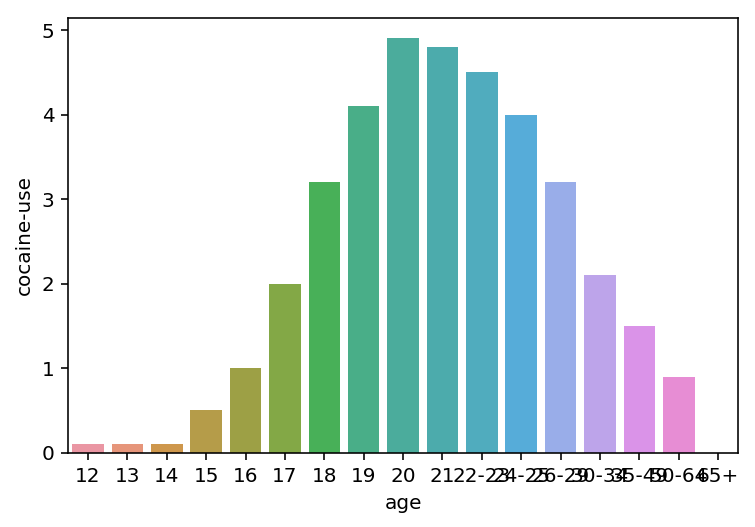

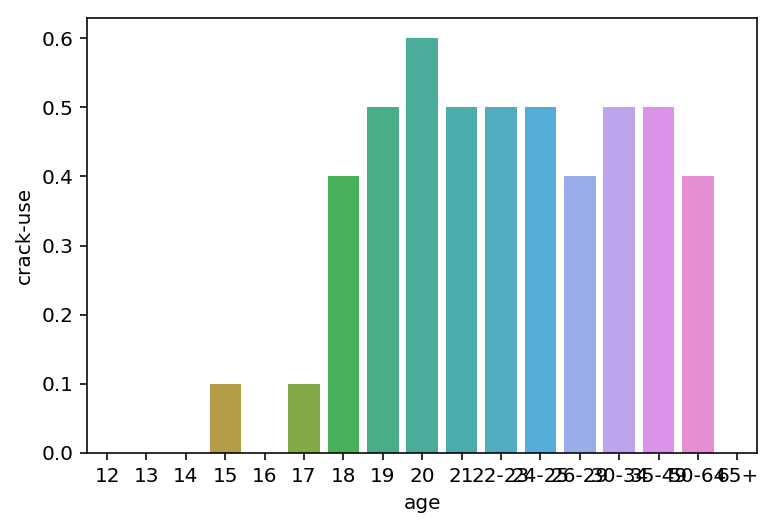

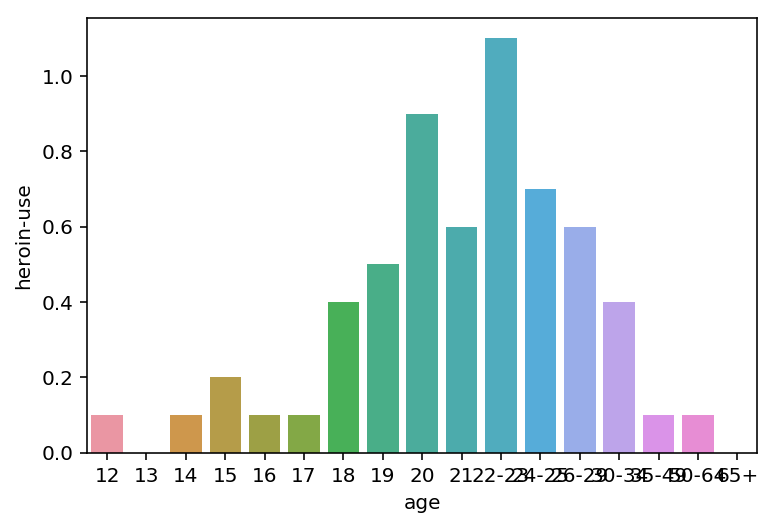

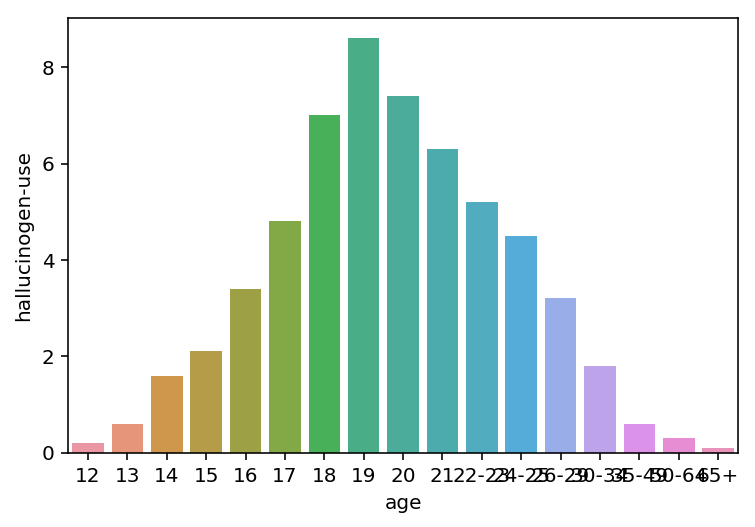

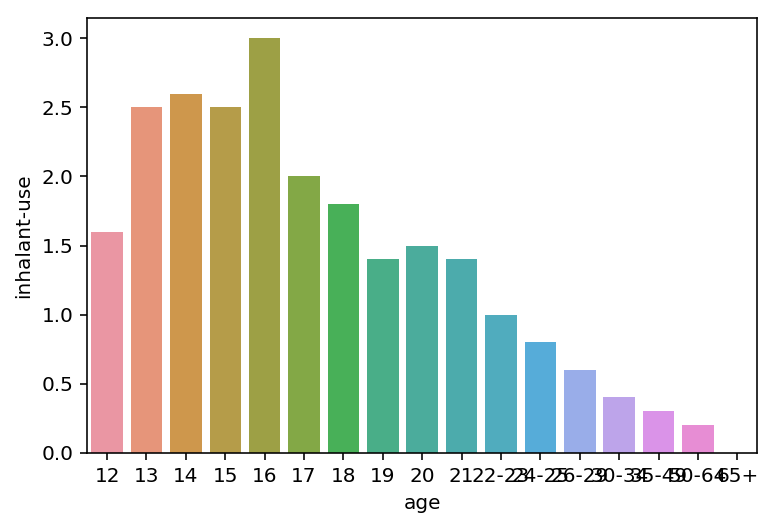

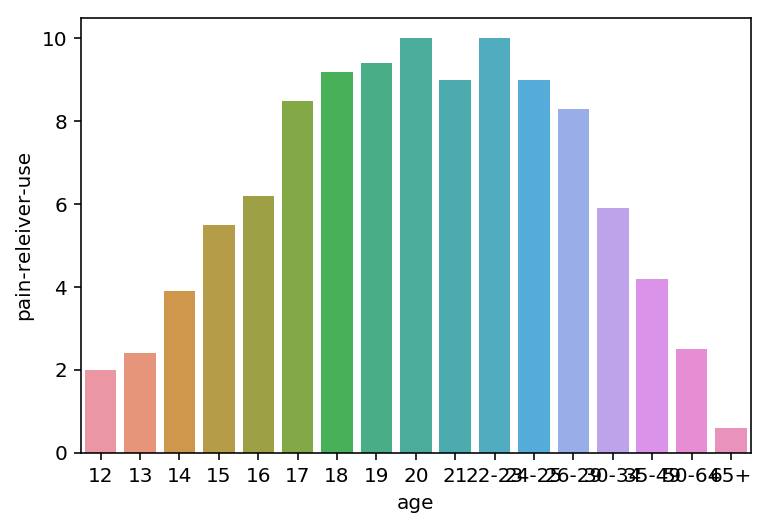

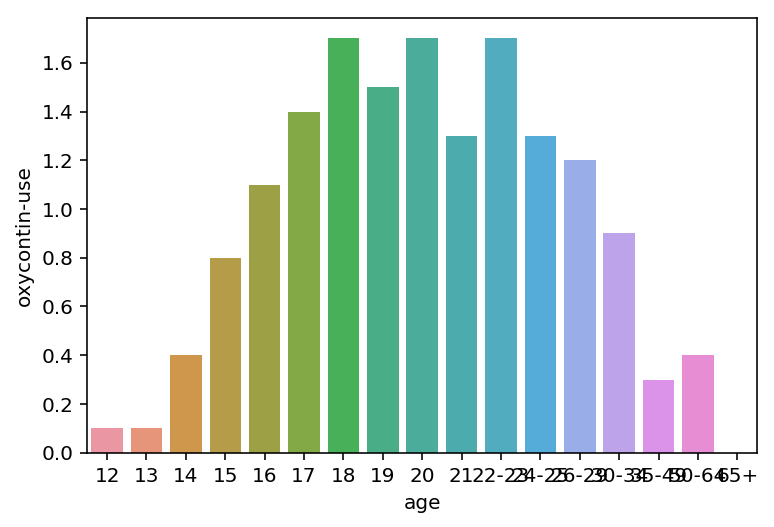

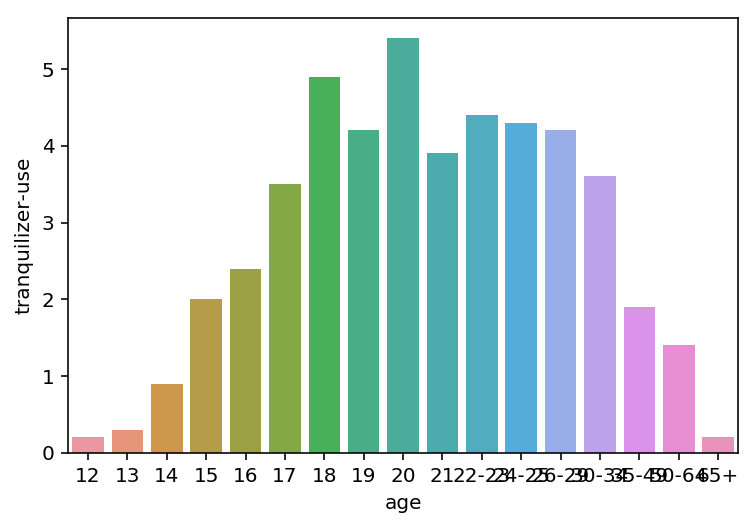

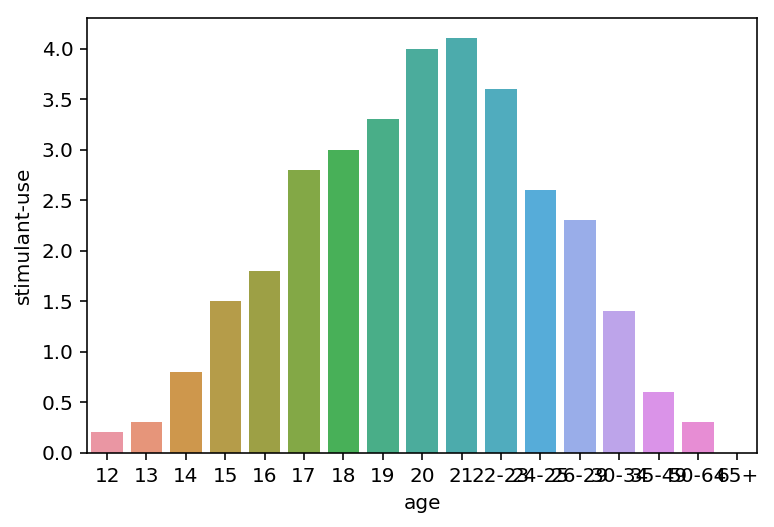

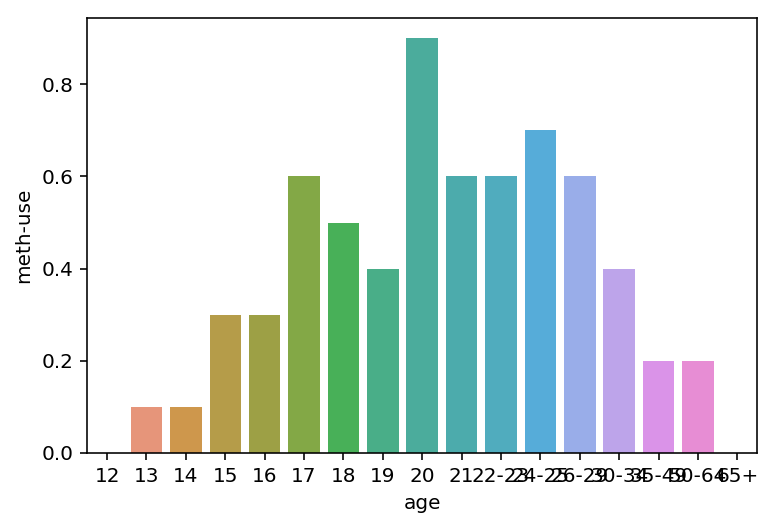

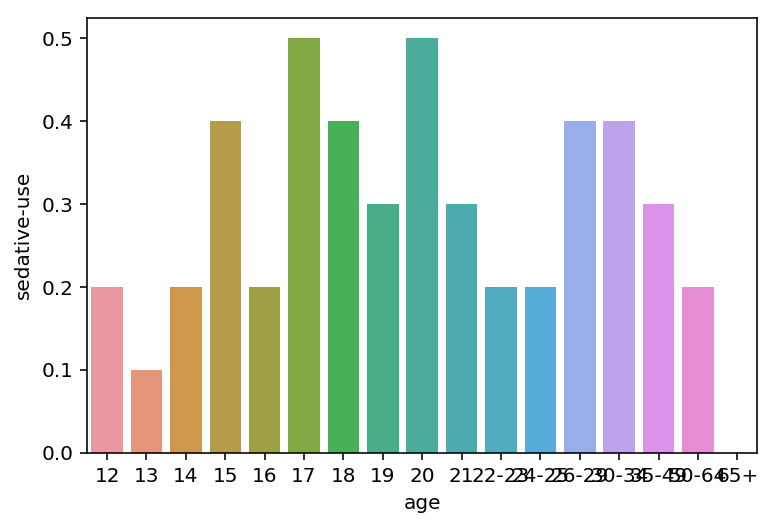

In [313]:
for column in drugdf.columns:
    if 'use' in column:
        plt.figure()
        sns.barplot(x = drugdf['age'], y = drugdf[column])


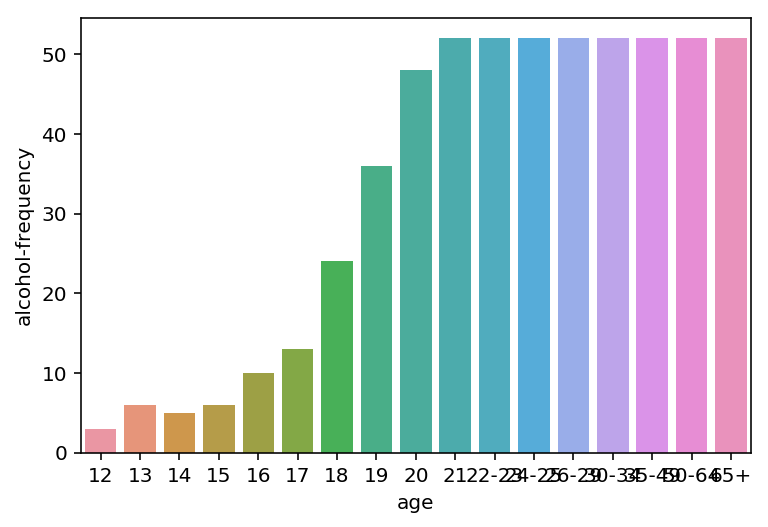

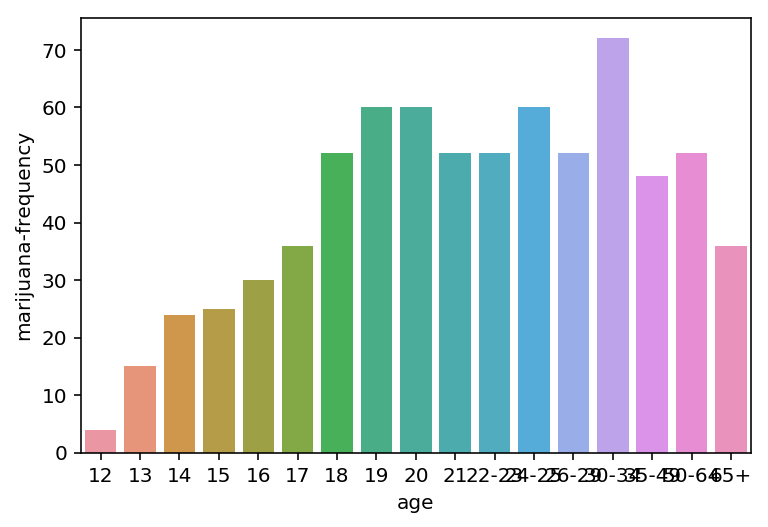

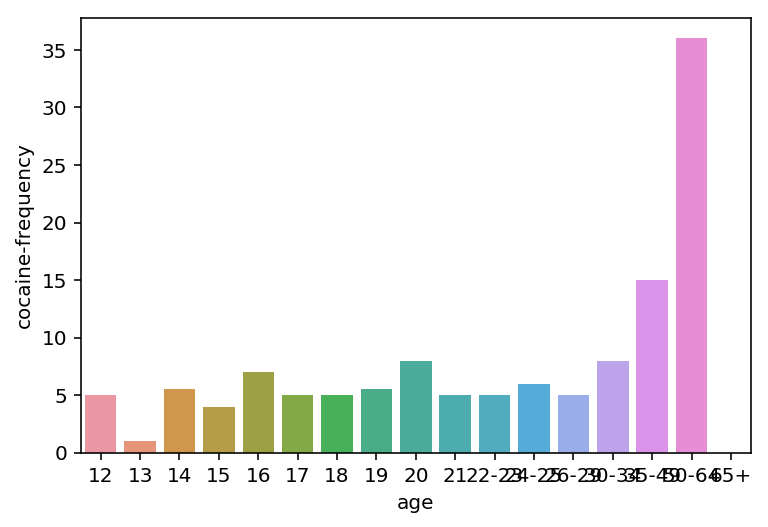

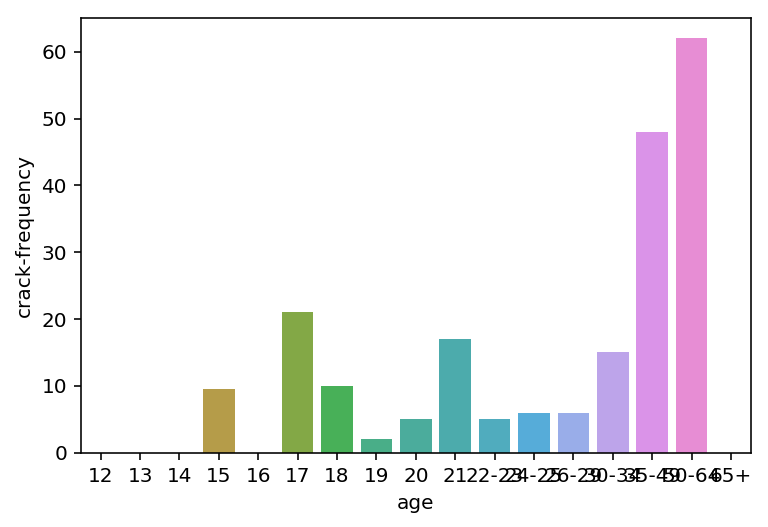

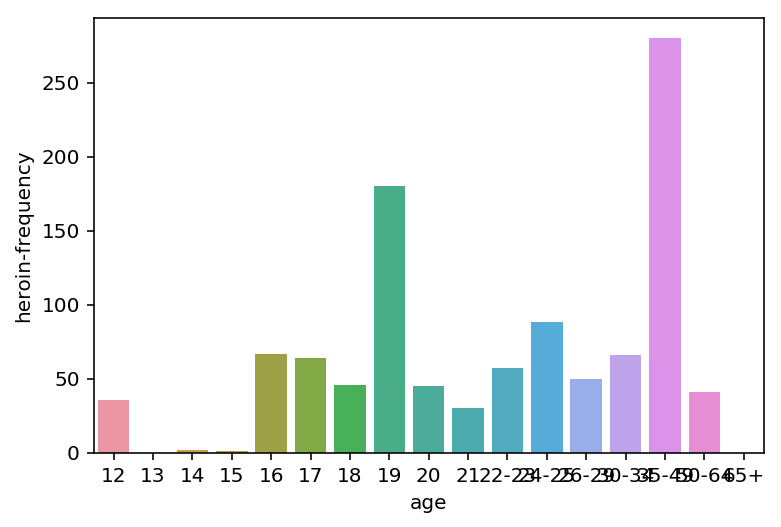

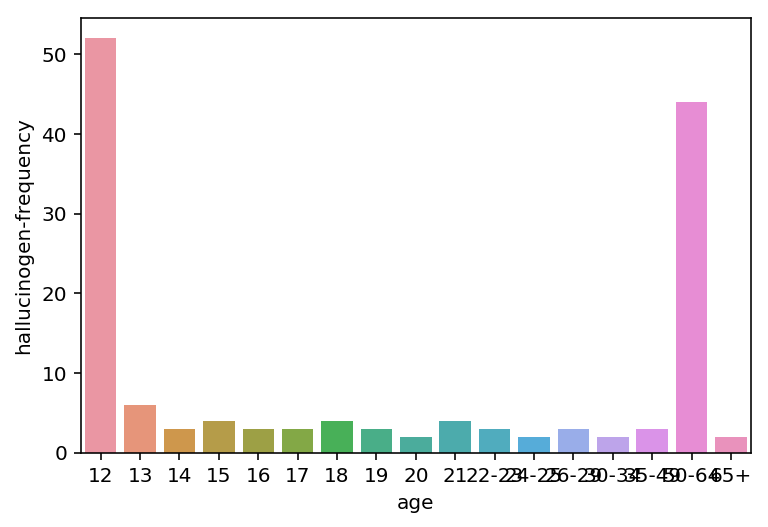

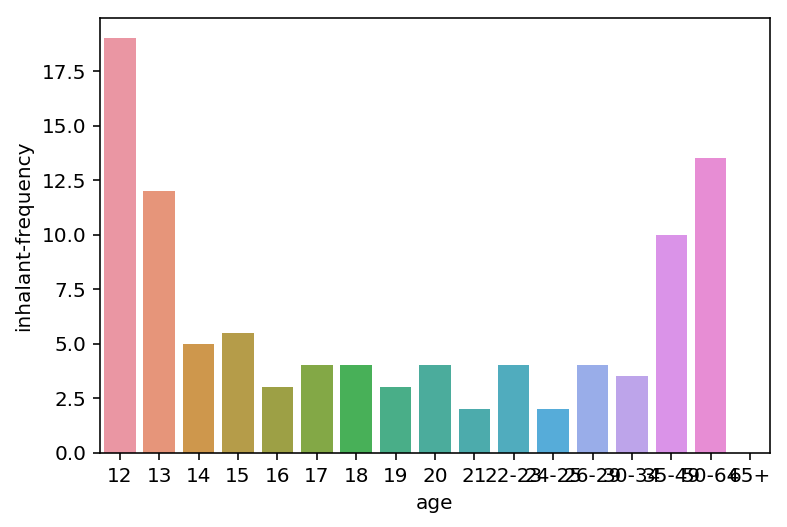

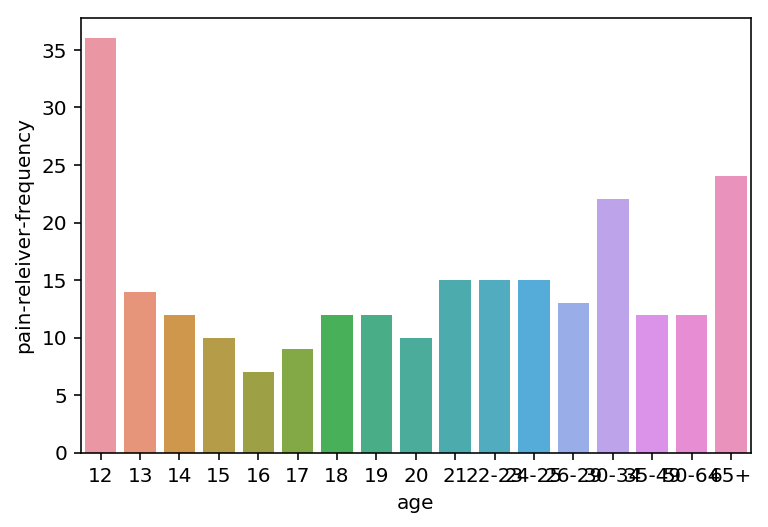

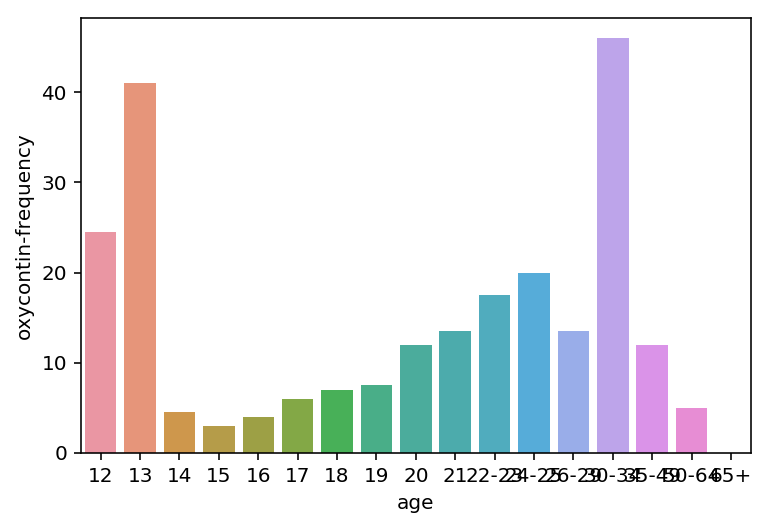

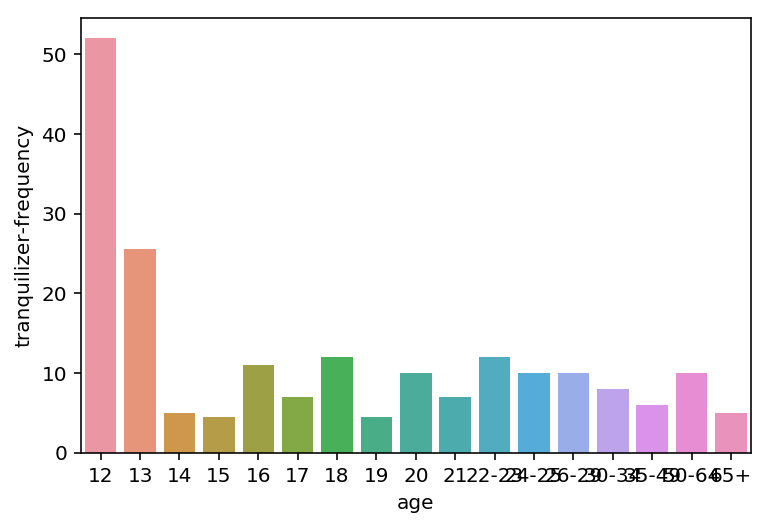

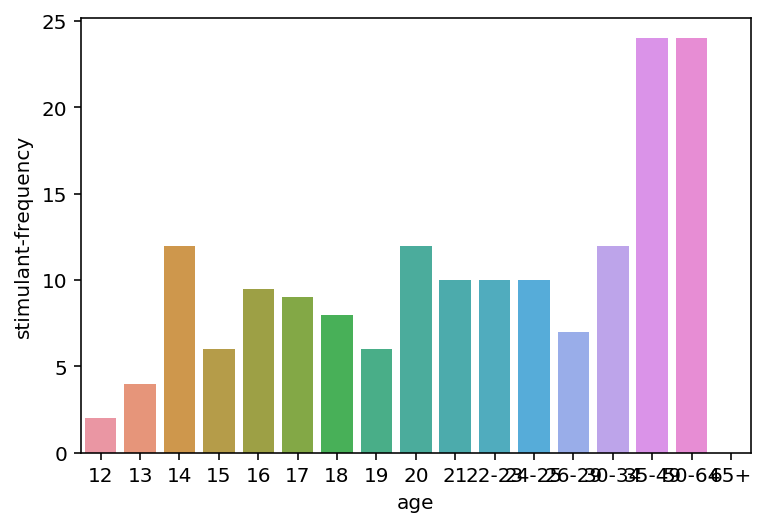

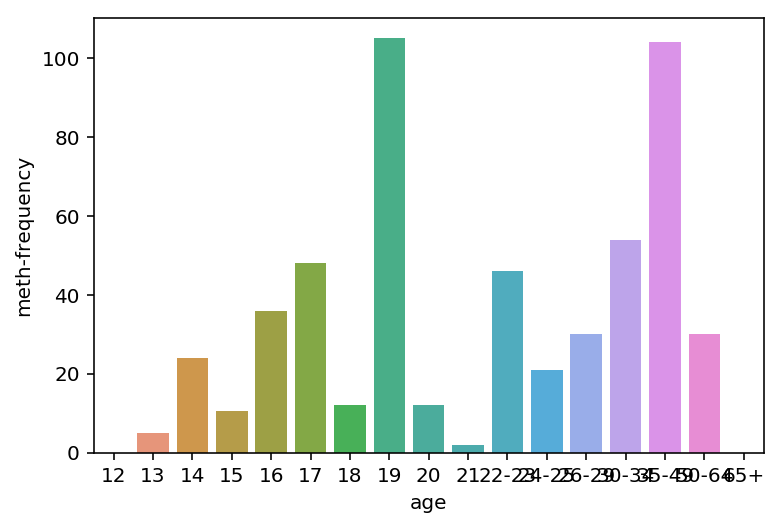

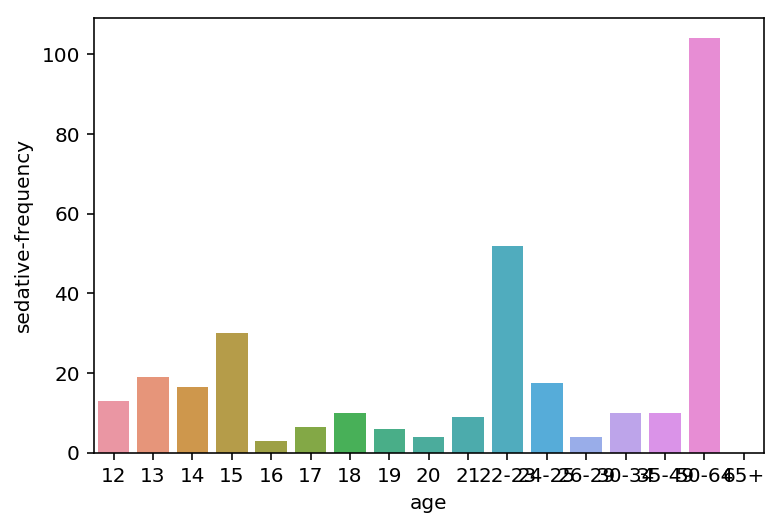

In [314]:
for column in drugdf.columns:
    if 'frequency' in column:
        plt.figure()
        sns.barplot(x = drugdf['age'], y = drugdf[column])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Perhaps for a research question along the lines of how to determine if a drug user uses pain relievers if all we know is that a particular user uses marijuana, an important question would be whether or not there exists a correlation between the users of both drugs.

As such, this statistical analysis would examine the data to see if the variance in usage of both drugs by age groups are correlated or not. 

(0.966225865412987, 3.06488579076475e-10)


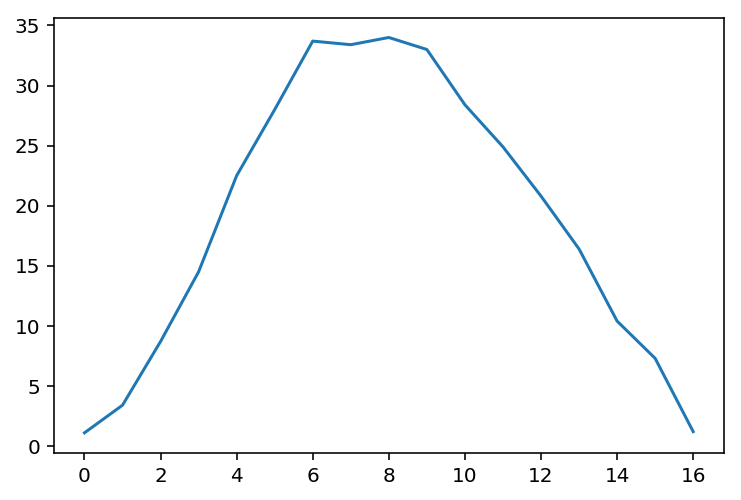

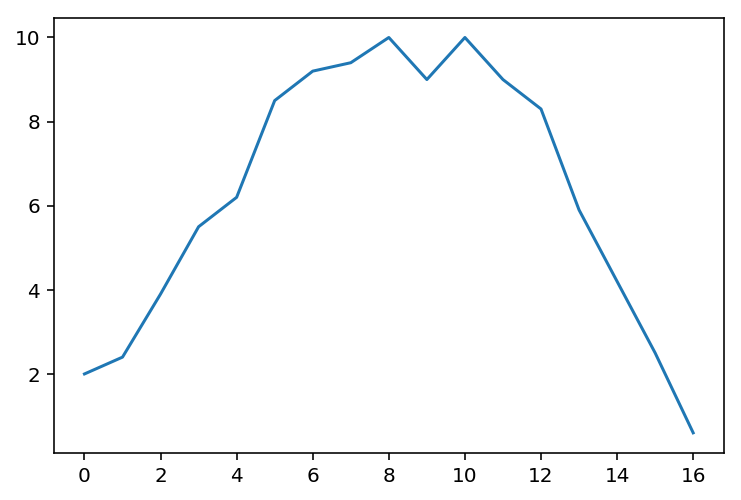

In [365]:
print stats.pearsonr(drugdf['marijuana-use'],drugdf['pain-releiver-use'])

drugdf['marijuana-use'].plot()
plt.figure()
drugdf['pain-releiver-use'].plot()

**Report**

The pearson correlation of the users of marijuana and pain relievers by age is 0.97, which indicates a high degree of correlation. Thus, it can be concluded that someone who uses marijuana is highly likely to be a user of pain relievers as well, and vice-versa.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

     Math  Rate State  Verbal  Score
27  439.0  26.0    OH   534.0  973.0
             Math       Rate      Verbal        Score
count   52.000000  52.000000   52.000000    52.000000
mean   531.500000  37.153846  532.019231  1063.519231
std     36.014975  27.301788   33.236225    67.498291
min    439.000000   4.000000  482.000000   956.000000
25%    504.000000   9.000000  501.000000  1004.500000
50%    521.000000  33.500000  526.500000  1043.500000
75%    555.750000  63.500000  562.000000  1119.250000
max    603.000000  82.000000  593.000000  1196.000000
             Math       Rate      Verbal        Score
count   51.000000  51.000000   51.000000    51.000000
mean   533.313725  37.372549  531.980392  1065.294118
std     33.890111  27.527412   33.565751    66.933189
min    474.000000   4.000000  482.000000   956.000000
25%    505.500000   9.000000  501.000000  1008.500000
50%    525.000000  34.000000  526.000000  1048.000000
75%    557.500000  64.000000  562.000000  1121.500000
max    6

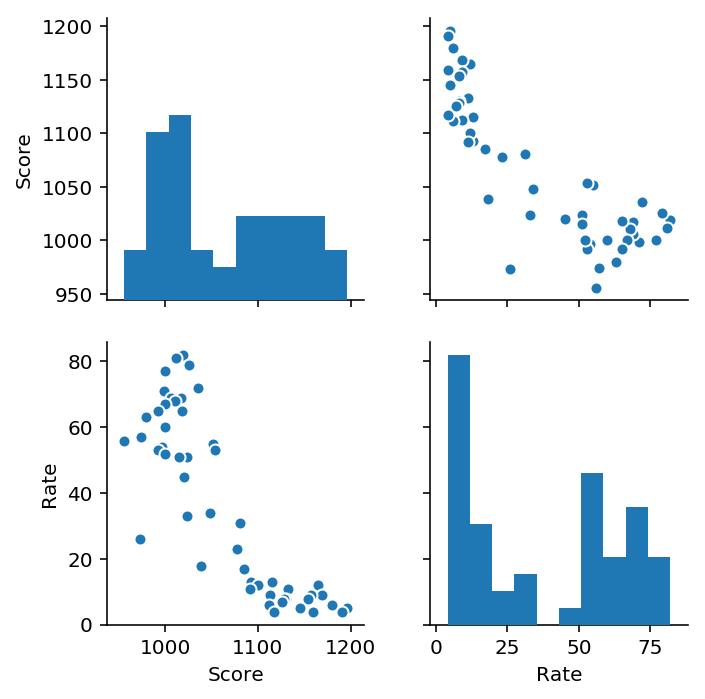

In [316]:
# I tried using the quartile method for the Rate variable by itself, but found no outliers outside of the range.

# print dataframe1[:-1].sort_values('Rate').Rate.describe()
# iqr = 64 - 9
# lower = 9 - 1.5 * iqr
# upper = 64 + 1.5 * iqr
# print lower, upper

# dataframe1[:-1].sort_values('Rate').Rate.plot()

#However, when using a bivariate dataset involving both Rate and the sum of the Math and Verbal scores, one outlier exists
dataframe1['Score'] = [dataframe1.loc[row, 'Math']+dataframe1.loc[row, 'Verbal'] for row in range(len(dataframe1.Math))]
sns.pairplot(dataframe1[['Score', 'Rate']])

# Tried to print the linear regression line but couldn't figure out how to do it
#slope, intercept, r_value, p_value, std_err = stats.linregress(dataframe1.Score, dataframe1.Rate)
#dataframe1[['Score','Rate']].corr()

print dataframe1[(dataframe1.Score < 1000) & (dataframe1.Rate < 50)]

print dataframe1.describe()

dataframe1.drop(dataframe1.index[27], inplace = True)

print dataframe1.describe()

#The standard deviation for Math has dropped, and the minimum has increased.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [346]:
print stats.spearmanr(dataframe1['Verbal'],dataframe1['Math'])[:]

print stats.pearsonr(dataframe1['Verbal'],dataframe1['Math'])

print "The pearson correlation only evaluates a linear relationship between two variable, while the spearman rank correlation is based on how the ranked value of the variables change together, or in other words relative to themselves."

print "It is calculated from evaluating the correlation of the ranked values for each variable within its own dataset and evaluates how the percentile scoring changes relative to each other."

(0.9363064272058435, 6.504677819453042e-24)
(0.969125910003546, 1.872639212210037e-31)
The pearson correlation only evaluates a linear relationship between two variable, while the spearman rank correlation is based on how the ranked value of the variables change together, or in other words relative to themselves.
It is calculated from evaluating the correlation of the ranked values for each variable within its own dataset and evaluates how the percentile scoring changes relative to each other.


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [347]:
dataframe1['Rate_percentile'] = [stats.percentileofscore(dataframe1.Rate, row) for row in dataframe1.Rate] 

# for row in dataframe1.Rate:
#     print stats.percentileofscore(dataframe1.Rate, row) 

print "The percentile of California in Rate is {}%.".format(float(dataframe1['Rate_percentile'][dataframe1.State == 'CA']))

print "The percentile is the factor used to calculate correlation between two variables in the spearman rank correlation."    

The percentile of California in Rate is 55.8823529412%.
The percentile is the factor used to calculate correlation between two variables in the spearman rank correlation.


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Visually, it makes the curve's features more prominent by amplifying the magnitute of fluctuations closer to the highest value.


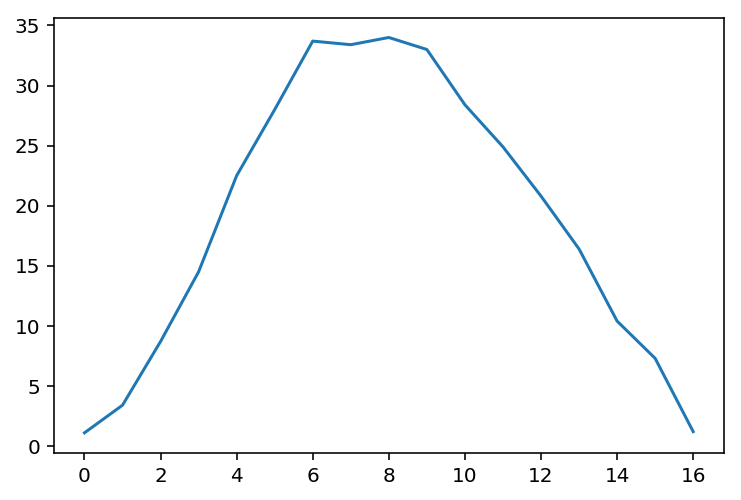

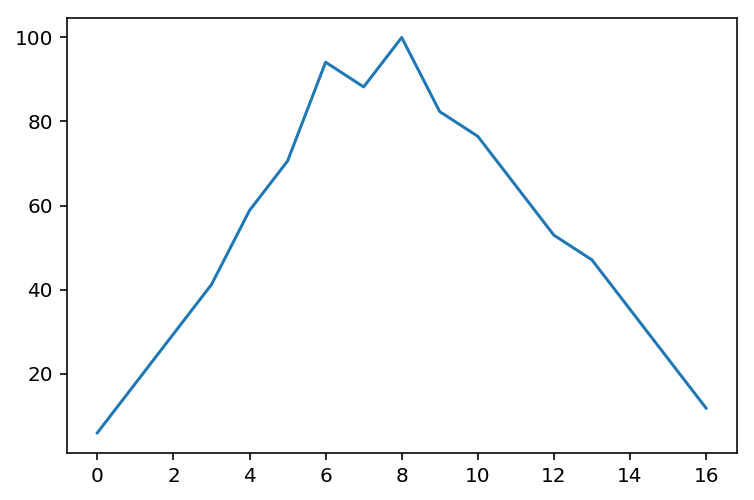

In [367]:
'''
Percentile scoring is useful for dealing with outliers as a sudden change in percentile
score indicates that a particular value is a potential outlier.
'''

drugdf['marijuana-use'].plot()

plt.figure()

drugdf['marijuana-percentile-use'] = [stats.percentileofscore(drugdf['marijuana-use'], row) for row in drugdf['marijuana-use']] 

drugdf['marijuana-percentile-use'].plot()

print "Visually, it makes the curve's features more prominent by amplifying the magnitute of fluctuations closer to the highest value."